In [197]:
import pandas as pd
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 5000)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [198]:
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2.csv")
df.drop(columns="index",inplace=True)

In [199]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [200]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist              127
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4016
LowDoc               2316
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [201]:
#show unique values in each column and its data type
for col in df.columns:
    print(f'{col} unique values are {df[col].unique()}')
    print("\n")
    print(f'{col} data type is {df[col].dtype}')

City unique values are ['NEW YORK' 'PAWTUCKET' 'ISSAQUAH' ... 'ST  FRANCIS' 'Stevens point'
 'Pylesville']


City data type is object
State unique values are ['NY' 'RI' 'WA' 'TX' 'CA' 'NC' 'MN' 'MO' 'FL' 'IA' 'IL' 'DC' 'PA' 'AL'
 'MS' 'OH' 'MA' 'NJ' 'ME' 'NV' 'LA' 'MI' 'IN' 'GA' 'UT' 'VA' 'WI' 'TN'
 'KS' 'NH' 'CO' 'CT' 'KY' 'AZ' 'ID' 'DE' 'SD' 'AR' 'MD' 'OK' 'SC' 'NM'
 'MT' 'NE' 'OR' 'WY' 'AK' 'HI' 'VT' 'ND' 'WV' nan]


State data type is object
Zip unique values are [10003  2860 98027 ... 78944 17814 95812]


Zip data type is int64
Bank unique values are ['JPMORGAN CHASE BANK NATL ASSOC' 'CITIZENS BANK NATL ASSOC'
 'FIRST-CITIZENS BK & TR CO' ... 'TULSA NATIONAL BANCSHARES, INC'
 'BEACH PLAZA LLC' 'THE LEADERS BANK']


Bank data type is object
BankState unique values are ['IL' 'RI' 'WA' 'CA' 'NC' 'MN' 'MO' 'OR' 'FL' 'IA' 'SD' 'DC' 'TX' 'PA'
 'VA' 'AL' 'OH' 'MS' 'IN' 'MA' 'ME' 'MI' 'DE' 'UT' 'SC' 'NY' 'KS' 'CO'
 'LA' 'WI' 'CT' 'AZ' 'AR' 'MD' 'OK' 'NM' 'ID' 'MT' 'NJ' 'KY' 'NE' 'WY'
 'GA

In [202]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [203]:
for i in df['RevLineCr']:
    if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
print("RevLineCr",df['RevLineCr'].unique())

for i in df['LowDoc']:
    if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
print("LowDoc",df['LowDoc'].unique())

for i in df['NewExist']:
    if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
print("NewExist",df['NewExist'].unique())

RevLineCr ['N' 'Y']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None]


In [204]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist             1057
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [205]:
category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
for column in category_cols:
  df[column]=df[column].fillna(df[column].mode()[0])

In [206]:
df.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [207]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(df,test_size=0.3,random_state=123)
X_train.shape, X_test.shape

((560178, 19), (240077, 19))

``` Training set has 560178 rows and testing set has 240077 samples

Target encoding is a data preprocessing technique used to convert categorical variables into numerical values that can be used by machine learning algorithms. It works by replacing each category with the average value of the target variable for that category. This can be helpful for algorithms that cannot handle categorical variables directly.

In this case the target variable is "MIS_Status"```

In [208]:
# Target encoder
import category_encoders as ce
categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist', 'UrbanRural']

encoder = ce.TargetEncoder(cols=categorical_columns)
encoder.fit(X_train, X_train['MIS_Status'])

train_encoded = encoder.transform(X_train)
test_encoded = encoder.transform(X_test)

# Renaming the columns
train_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in train_encoded.columns}, inplace=False)
test_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in test_encoded.columns}, inplace=False)

train_encoded.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
148172,0.215946,0.165802,45648,0.740692,0.217642,452990,2,0.17067,2,2,0,0.186517,0.152625,0.186815,12500.0,0.0,12500.0,10625.0,1
744579,0.226933,0.165802,43240,0.133135,0.158188,445310,7,0.17067,0,0,0,0.243731,0.152625,0.186815,20000.0,0.0,20000.0,10000.0,0
321200,0.252778,0.196143,21037,0.194430,0.076619,0,3,0.17067,0,0,1,0.070886,0.152625,0.089154,25000.0,0.0,25000.0,20000.0,0
74901,0.275938,0.184227,90071,0.141177,0.178801,541310,12,0.17067,12,12,1,0.243731,0.251879,0.186815,985500.0,0.0,350000.0,175000.0,1
426895,0.057056,0.184227,95037,0.412096,0.380604,561720,1,0.17067,0,1,0,0.243731,0.152625,0.186815,50000.0,0.0,50000.0,25000.0,0


StandardScaler in scikit-learn is a preprocessing technique that centers and scales numerical features such that they have a mean of zero and a standard deviation of one.

We will make use of the StandardScaler, which is used to transform both the training and test data in the same way, ensuring that the features have the same mean and standard deviation in both datasets.

Here we will scale it on the training set and transform on both training and testing

In [209]:
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross']
scaler = StandardScaler()
train_encoded[numerical_columns] = scaler.fit_transform(train_encoded[numerical_columns])
test_encoded[numerical_columns] = scaler.transform(test_encoded[numerical_columns])

train_encoded.head()


,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
148172,0.215946,0.165802,45648,0.740692,0.217642,452990,-0.123748,0.17067,-0.026808,-0.036871,0,0.186517,0.152625,0.186815,-0.654946,-0.002095,-0.635102,-0.606817,1
744579,0.226933,0.165802,43240,0.133135,0.158188,445310,-0.058247,0.17067,-0.035352,-0.045405,0,0.243731,0.152625,0.186815,-0.628851,-0.002095,-0.608622,-0.609553,0
321200,0.252778,0.196143,21037,0.194430,0.076619,0,-0.110648,0.17067,-0.035352,-0.045405,1,0.070886,0.152625,0.089154,-0.611454,-0.002095,-0.590969,-0.565780,0
74901,0.275938,0.184227,90071,0.141177,0.178801,541310,0.007255,0.17067,0.015917,0.005801,1,0.243731,0.251879,0.186815,2.730474,-0.002095,0.556485,0.112702,1
426895,0.057056,0.184227,95037,0.412096,0.380604,561720,-0.136849,0.17067,-0.035352,-0.041138,0,0.243731,0.152625,0.186815,-0.524470,-0.002095,-0.502703,-0.543894,0


We have created Feature extraction by making use of old variables in the following way


(1) Log_Disbursement which gives the natural logarithmic form of DisbursementGross variable

(2) Log_GrAppv the logarithmic version of the approved loan amount by the bank

(3) Log_SBA_Appv, the logarithmic amount of the approved loan that will be assisted by SBA 

(4) Log_BalanceGross, is the logarithmic amount of total amount in an account or the total value of a financial asset or liability before any deductions or adjustments are made.

(5) TotalJobs variable which is an addition of Createjobs(New people recruited) and RetainedJob (workers working before)

(6) IncomeToLoan its values are calculated by dividing the 'DisbursementGross' column by the 'SBA_Appv' column for each corresponding row. This ratio can help you analyze the relationship between the amount disbursed and the approved SBA loan amount in terms of income.

(7)  EmployeesToLoanRatio, its values are calculated by dividing the 'NoEmp' column (number of employees) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the relationship between the number of employees and the size of the SBA loan approved for each entry in the dataset.

(8) JobPerLoan, its values are calculated by dividing the 'TotalJobs' column (representing the total number of jobs) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the impact of the SBA loan on job creation or support, expressed as the number of jobs per unit of loan amount approved.

(9) Gauren_SBA_Appv, Its values are calculated by dividing the 'GrAppv' column (gross amount approved by the lender) by the 'SBA_Appv' column (the approved SBA loan amount) for each corresponding row. This ratio helps you analyze the extent to which the SBA is guaranteeing the loan relative to the total loan amount approved by the lender.

(10) DefaultRate, Finally, we create a new feature 'DefaultRate' in the 'train_encoded' DataFrame and set its value to the calculated default rate for the particular group of loans based on the "MIS_Status" variable. This feature will represent the percentage of loans in the group that are classified as defaults.

In [210]:
# Adding Features
import numpy as np
# Apply the log transformation to the specific feature in your training data
#small_constant = 1e-10  # You can adjust this constant as needed
# df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])
train_encoded['TotalJobs'] = train_encoded['CreateJob'] + train_encoded['RetainedJob']
#train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
# Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
train_encoded['IncomeToLoanRatio'] = train_encoded['DisbursementGross'] / train_encoded['SBA_Appv']
# Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
train_encoded['EmployeesToLoanRatio'] = train_encoded['NoEmp'] / train_encoded['SBA_Appv']
# Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
#train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
# Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
train_encoded['JobPerLoan'] = train_encoded['TotalJobs'] / train_encoded['SBA_Appv'] 
# Calculate SBA's Gaurenteed Portion of Approved Loan
train_encoded['Gauren_SBA_Appv'] = train_encoded['GrAppv'] / train_encoded['SBA_Appv']
# Filter the DataFrame to include only the relevant rows
default_group = train_encoded[train_encoded['MIS_Status'].isin([0, 1])]
# Calculate the total number of loans in the filtered group
total_loans = len(default_group)
# Calculate the number of defaults (CHGOFF) in the filtered group
default_loans = len(default_group[default_group['MIS_Status'] == 1])
# Calculate the default rate as a percentage
default_rate = (default_loans / total_loans) * 100
# Create a new feature 'DefaultRate' with the calculated default rate
train_encoded['DefaultRate'] = default_rate

In [211]:
# Adding Features
import numpy as np
# Apply the log transformation to the specific feature in your training data
#small_constant = 1e-10  # You can adjust this constant as needed
# df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
test_encoded['Log_DisbursementGross'] = np.log1p(test_encoded['DisbursementGross'])
test_encoded['Log_GrAppv'] = np.log1p(test_encoded['GrAppv'])
test_encoded['Log_SBA_Appv'] = np.log1p(test_encoded['SBA_Appv'])
test_encoded['Log_BalanceGross'] = np.log1p(test_encoded['BalanceGross'])
test_encoded['TotalJobs'] = test_encoded['CreateJob'] + test_encoded['RetainedJob']
#train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
# Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
test_encoded['IncomeToLoanRatio'] = test_encoded['DisbursementGross'] / test_encoded['SBA_Appv']
# Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
test_encoded['EmployeesToLoanRatio'] = test_encoded['NoEmp'] / test_encoded['SBA_Appv']
# Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
#train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
# Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
test_encoded['JobPerLoan'] = test_encoded['TotalJobs'] / test_encoded['SBA_Appv'] 
# Calculate SBA's Gaurenteed Portion of Approved Loan
test_encoded['Gauren_SBA_Appv'] = test_encoded['GrAppv'] / test_encoded['SBA_Appv']
# Filter the DataFrame to include only the relevant rows
default_group = test_encoded[test_encoded['MIS_Status'].isin([0, 1])]
# Calculate the total number of loans in the filtered group
total_loans = len(default_group)
# Calculate the number of defaults (CHGOFF) in the filtered group
default_loans = len(default_group[default_group['MIS_Status'] == 1])
# Calculate the default rate as a percentage
default_rate = (default_loans / total_loans) * 100
# Create a new feature 'DefaultRate' with the calculated default rate
test_encoded['DefaultRate'] = default_rate

In [212]:
train_encoded.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'MIS_Status', 'Log_DisbursementGross', 'Log_GrAppv',
       'Log_SBA_Appv', 'Log_BalanceGross', 'TotalJobs', 'IncomeToLoanRatio',
       'EmployeesToLoanRatio', 'JobPerLoan', 'Gauren_SBA_Appv', 'DefaultRate'],
      dtype='object')

In [213]:
X_train = train_encoded.copy()
X_test = test_encoded.copy()

In [214]:
y_train = X_train['MIS_Status']
X_train.drop(columns='MIS_Status', axis=1, inplace=True)
y_test = X_test['MIS_Status']
X_test.drop(columns='MIS_Status', axis=1, inplace=True)


In [215]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

In [216]:
from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

AUC score on Test dataset: 0.8205511277259651
AUC score on Train dataset: 0.8468756526040521


In [217]:
from optuna.integration import LightGBMPruningCallback
import tqdm as notebook_tqdm
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import optuna
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        # Refer to the Official guide : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
        "num_iterations": 10000,
        "num_threads": 16,
        "learning_rate": trial.suggest_float("learning_rate", 1e-1, 0.8, log=True),
        #"num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "num_leaves": trial.suggest_int("num_leaves", 20, 700, step=10),
        #"num_leaves": trial.suggest_int("num_leaves", 2, 2**8, step=2),
        "max_depth": trial.suggest_int("max_depth", 10, 17, step=2),
        #"max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-1, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-1, 10.0, log=True),
        #"lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        #"lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0.01, 0.1, step=0.01),
        #"lambda_l2": trial.suggest_float("lambda_l2", 0.01, 0.1, step=0.01),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        #"bagging_freq": 1,
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc",
        "num_threads": 16
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    cv_iteractions = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1}, categorical_feature=categorical_columns)
        valid_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1}, categorical_feature=categorical_columns)
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_test)
        cv_scores[idx] = roc_auc_score(y_test, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
    study_model_iteractions[trial.number] = np.mean(cv_iteractions)

    return np.mean(cv_scores)

[I 2023-12-09 13:15:51,726] A new study created in memory with name: LGBM Classifier
[I 2023-12-09 13:15:51,818] Trial 0 finished with value: 0.6188432832237607 and parameters: {'learning_rate': 0.45848413236471763, 'num_leaves': 570, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 0.11639109835182944, 'lambda_l2': 3.025945311650617, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.6188432832237607.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.598916
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.638889
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.671748
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.637534
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.54713
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores

[I 2023-12-09 13:15:51,865] Trial 1 finished with value: 0.5 and parameters: {'learning_rate': 0.1249839794249454, 'num_leaves': 120, 'max_depth': 10, 'min_data_in_leaf': 600, 'lambda_l1': 0.14929691874974282, 'lambda_l2': 0.35557375431622357, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.6188432832237607.
[I 2023-12-09 13:15:51,914] Trial 2 finished with value: 0.5 and parameters: {'learning_rate': 0.4756647831900594, 'num_leaves': 630, 'max_depth': 10, 'min_data_in_leaf': 900, 'lambda_l1': 0.1294517250165235, 'lambda_l2': 5.721628710970751, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.6188432832237607.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:51,962] Trial 3 finished with value: 0.5 and parameters: {'learning_rate': 0.62096257403626, 'num_leaves': 380, 'max_depth': 14, 'min_data_in_leaf': 1000, 'lambda_l1': 4.3933640621977155, 'lambda_l2': 0.1372766207565908, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.6188432832237607.
[I 2023-12-09 13:15:52,010] Trial 4 finished with value: 0.5 and parameters: {'learning_rate': 0.6128195404063046, 'num_leaves': 80, 'max_depth': 16, 'min_data_in_leaf': 800, 'lambda_l1': 0.3811324934792768, 'lambda_l2': 2.415213468362652, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.6188432832237607.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-09 13:15:52,067] Trial 5 finished with value: 0.5 and parameters: {'learning_rate': 0.36035060577344596, 'num_leaves': 540, 'max_depth': 12, 'min_data_in_leaf': 500, 'lambda_l1': 1.321064289483643, 'lambda_l2': 1.127755619459698, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.6188432832237607.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:52,122] Trial 6 finished with value: 0.5 and parameters: {'learning_rate': 0.6888519581854599, 'num_leaves': 600, 'max_depth': 14, 'min_data_in_leaf': 300, 'lambda_l1': 2.3310586995684974, 'lambda_l2': 0.22281963146852052, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.6188432832237607.
[I 2023-12-09 13:15:52,178] Trial 7 finished with value: 0.5 and parameters: {'learning_rate': 0.7265359802221922, 'num_leaves': 530, 'max_depth': 10, 'min_data_in_leaf': 400, 'lambda_l1': 0.19696558050910323, 'lambda_l2': 1.3876829721505406, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.6188432832237607.
[I 2023-12-09 13:15:52,231] Trial 8 finished with value: 0.5 and parameters: {'learning_rate': 0.13256556368458366, 'num_leaves': 280, 'max_depth': 10, 'min_data_in_leaf': 900, 'lambda_l1': 8.257745884141993, 'lambda_l2': 2.54044044

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-09 13:15:52,288] Trial 9 finished with value: 0.5 and parameters: {'learning_rate': 0.17347115325293777, 'num_leaves': 490, 'max_depth': 10, 'min_data_in_leaf': 300, 'lambda_l1': 0.20145657904303543, 'lambda_l2': 1.9533059385631502, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.6188432832237607.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:52,406] Trial 10 finished with value: 0.6489828755481035 and parameters: {'learning_rate': 0.25067242384122557, 'num_leaves': 350, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.5256007959334595, 'lambda_l2': 8.099432055373672, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 10 with value: 0.6489828755481035.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.676829
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.670732
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.605352
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.615176
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.676825


[I 2023-12-09 13:15:52,473] Trial 11 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.693767
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.691057


[I 2023-12-09 13:15:52,608] Trial 12 finished with value: 0.663127161923639 and parameters: {'learning_rate': 0.2823628553136314, 'num_leaves': 700, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 0.550351729147752, 'lambda_l2': 4.851338658983228, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.590786
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.664973
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.675053
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.672087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.683604
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.678184
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.696315


[I 2023-12-09 13:15:52,744] Trial 13 finished with value: 0.6595881373413308 and parameters: {'learning_rate': 0.2490497740561976, 'num_leaves': 690, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.7741321966340782, 'lambda_l2': 8.258738079248952, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.678184
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.688008
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.651423
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.709072


[I 2023-12-09 13:15:52,880] Trial 14 finished with value: 0.6588874868195882 and parameters: {'learning_rate': 0.20019958517590783, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.0114315511401095, 'lambda_l2': 5.025767133402557, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.
[I 2023-12-09 13:15:52,986] Trial 15 finished with value: 0.5 and parameters: {'learning_rate': 0.3409599678331127, 'num_leaves': 700, 'max_depth': 16, 'min_data_in_leaf': 300, 'lambda_l1': 1.5267730846463552, 'lambda_l2': 4.50330562904511, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:53,096] Trial 16 finished with value: 0.5 and parameters: {'learning_rate': 0.200987361133815, 'num_leaves': 440, 'max_depth': 14, 'min_data_in_leaf': 600, 'lambda_l1': 0.7287122427648265, 'lambda_l2': 8.779446307479466, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:15:53,202] Trial 17 finished with value: 0.5 and parameters: {'learning_rate': 0.3022489001561351, 'num_leaves': 640, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 0.3065672326569735, 'lambda_l2': 0.6079916407594831, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:53,306] Trial 18 finished with value: 0.5 and parameters: {'learning_rate': 0.23108421222644607, 'num_leaves': 220, 'max_depth': 16, 'min_data_in_leaf': 500, 'lambda_l1': 0.7343876773463412, 'lambda_l2': 3.9078383029348918, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:53,425] Trial 19 finished with value: 0.5 and parameters: {'learning_rate': 0.10312243410178229, 'num_leaves': 440, 'max_depth': 14, 'min_data_in_leaf': 700, 'lambda_l1': 0.30012208208413993, 'lambda_l2': 6.03563761278701, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:53,537] Trial 20 finished with value: 0.5 and parameters: {'learning_rate': 0.2808651218151498, 'num_leaves': 190, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 2.0965440613199653, 'lambda_l2': 3.480156212573145, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.678184
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.687331
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't im

[I 2023-12-09 13:15:53,686] Trial 21 finished with value: 0.6630880288250083 and parameters: {'learning_rate': 0.1942053901673543, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9876589402587984, 'lambda_l2': 5.274365767610966, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.
[I 2023-12-09 13:15:53,753] Trial 22 pruned. Trial was pruned at iteration 9.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:53,863] Trial 23 finished with value: 0.5 and parameters: {'learning_rate': 0.22105804145866162, 'num_leaves': 630, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 1.0120628007691843, 'lambda_l2': 4.257827221742065, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:15:53,984] Trial 24 finished with value: 0.5 and parameters: {'learning_rate': 0.3133533388572341, 'num_leaves': 580, 'max_depth': 14, 'min_data_in_leaf': 400, 'lambda_l1': 0.4533464515576432, 'lambda_l2': 9.665217536601686, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:54,120] Trial 25 finished with value: 0.6531215248367934 and parameters: {'learning_rate': 0.2565075841907337, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6476937516418257, 'lambda_l2': 6.0376974439636655, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.677507
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.685637
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.634146
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.700567
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation score

[I 2023-12-09 13:15:54,238] Trial 26 finished with value: 0.5 and parameters: {'learning_rate': 0.3683664796904341, 'num_leaves': 490, 'max_depth': 14, 'min_data_in_leaf': 400, 'lambda_l1': 0.9234777706606107, 'lambda_l2': 1.7017751229991724, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.
[I 2023-12-09 13:15:54,345] Trial 27 finished with value: 0.5 and parameters: {'learning_rate': 0.16803899198608727, 'num_leaves': 640, 'max_depth': 12, 'min_data_in_leaf': 300, 'lambda_l1': 0.33289310469515093, 'lambda_l2': 2.8260983333760445, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:54,468] Trial 28 finished with value: 0.5 and parameters: {'learning_rate': 0.2895635635615573, 'num_leaves': 650, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.3939508727754102, 'lambda_l2': 3.8136237611246027, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:54,585] Trial 29 finished with value: 0.5 and parameters: {'learning_rate': 0.4104066851367686, 'num_leaves': 560, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 0.10432779516411882, 'lambda_l2': 7.239864416233216, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.690718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.670732
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.590786
Training until validation scores don't im

[I 2023-12-09 13:15:54,728] Trial 30 finished with value: 0.6466731104235209 and parameters: {'learning_rate': 0.22188916558938282, 'num_leaves': 590, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.4535025051584759, 'lambda_l2': 2.727705335681095, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.678184
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.688008
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.651423


[I 2023-12-09 13:15:54,887] Trial 31 finished with value: 0.6588874868195882 and parameters: {'learning_rate': 0.19668689428761835, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.0005593059545268, 'lambda_l2': 4.992396070434771, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.709072
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.678184
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.688008
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:15:55,034] Trial 32 finished with value: 0.6588874868195882 and parameters: {'learning_rate': 0.19479645081705682, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.0130435055463425, 'lambda_l2': 4.876304840253824, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.651423
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.709072


[I 2023-12-09 13:15:55,167] Trial 33 finished with value: 0.5 and parameters: {'learning_rate': 0.2743429255294917, 'num_leaves': 610, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 0.5917081309491313, 'lambda_l2': 6.745148816220628, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:55,284] Trial 34 finished with value: 0.5 and parameters: {'learning_rate': 0.15136175200425, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 0.8442488621843226, 'lambda_l2': 3.268380012231026, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:55,405] Trial 35 finished with value: 0.5 and parameters: {'learning_rate': 0.23462083788890403, 'num_leaves': 510, 'max_depth': 10, 'min_data_in_leaf': 300, 'lambda_l1': 0.5964178537470871, 'lambda_l2': 5.73592019347307, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 12 with value: 0.663127161923639.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:55,546] Trial 36 finished with value: 0.6663007841984869 and parameters: {'learning_rate': 0.2044171224903427, 'num_leaves': 570, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.2746383652126778, 'lambda_l2': 2.1048205025582885, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.721206
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.66023
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.689227


[I 2023-12-09 13:15:55,673] Trial 37 finished with value: 0.5 and parameters: {'learning_rate': 0.3198145273525804, 'num_leaves': 560, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.637456848481323, 'lambda_l2': 2.1293047937425014, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-09 13:15:55,797] Trial 38 finished with value: 0.5 and parameters: {'learning_rate': 0.49885628912030766, 'num_leaves': 450, 'max_depth': 14, 'min_data_in_leaf': 300, 'lambda_l1': 1.1692152612380085, 'lambda_l2': 3.0579039191035267, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.592818
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.619919
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.67966


[I 2023-12-09 13:15:55,943] Trial 39 finished with value: 0.656257166398737 and parameters: {'learning_rate': 0.1517930049479093, 'num_leaves': 40, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.887566103273827, 'lambda_l2': 1.5793661150364993, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.
[I 2023-12-09 13:15:56,072] Trial 40 finished with value: 0.5 and parameters: {'learning_rate': 0.26358370779929224, 'num_leaves': 600, 'max_depth': 16, 'min_data_in_leaf': 700, 'lambda_l1': 2.3841837586697903, 'lambda_l2': 8.002416874259975, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.677507
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.693428
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't i

[I 2023-12-09 13:15:56,267] Trial 41 finished with value: 0.6609868455169314 and parameters: {'learning_rate': 0.2202631787754173, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.115884443908147, 'lambda_l2': 4.7889324022815725, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.664973
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.701276
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.721206
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089


[I 2023-12-09 13:15:56,442] Trial 42 finished with value: 0.664310133888015 and parameters: {'learning_rate': 0.2170462799510564, 'num_leaves': 630, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.2970675437758128, 'lambda_l2': 2.279610008877444, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.660908
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.678597
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:56,567] Trial 43 finished with value: 0.5 and parameters: {'learning_rate': 0.21543893518561597, 'num_leaves': 620, 'max_depth': 14, 'min_data_in_leaf': 1000, 'lambda_l1': 1.259835552055804, 'lambda_l2': 2.296977977477023, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.
[I 2023-12-09 13:15:56,719] Trial 44 finished with value: 0.6631833407278085 and parameters: {'learning_rate': 0.2399194268416127, 'num_leaves': 540, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.5923489227734042, 'lambda_l2': 1.0782379702165288, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.659214
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.681432
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation score

[I 2023-12-09 13:15:56,846] Trial 45 finished with value: 0.5 and parameters: {'learning_rate': 0.23790288533250717, 'num_leaves': 530, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 2.6759594731104657, 'lambda_l2': 1.3532788372517086, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.654133
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.677888


[I 2023-12-09 13:15:56,983] Trial 46 finished with value: 0.6614583633433784 and parameters: {'learning_rate': 0.2788476679027448, 'num_leaves': 380, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 3.2887822248078793, 'lambda_l2': 0.9923181567963373, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.
[I 2023-12-09 13:15:57,129] Trial 47 finished with value: 0.5 and parameters: {'learning_rate': 0.18531451141966016, 'num_leaves': 550, 'max_depth': 14, 'min_data_in_leaf': 900, 'lambda_l1': 1.5743405828942885, 'lambda_l2': 2.1375682885334095, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-09 13:15:57,252] Trial 48 finished with value: 0.5 and parameters: {'learning_rate': 0.20320077731336128, 'num_leaves': 470, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.8085459764961438, 'lambda_l2': 2.645851888900225, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:57,383] Trial 49 finished with value: 0.5 and parameters: {'learning_rate': 0.245005099090349, 'num_leaves': 410, 'max_depth': 14, 'min_data_in_leaf': 400, 'lambda_l1': 1.2642443279325253, 'lambda_l2': 0.9996645914042155, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 36 with value: 0.6663007841984869.
[I 2023-12-09 13:15:57,502] Trial 50 finished with value: 0.5 and parameters: {'learning_rate': 0.16388547530151484, 'num_leaves': 580, 'max_depth': 14, 'min_data_in_leaf': 300, 'lambda_l1': 4.090094868392953, 'lambda_l2': 3.4033047642707084, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't im

[I 2023-12-09 13:15:57,663] Trial 51 finished with value: 0.6606328710345928 and parameters: {'learning_rate': 0.2714332217679869, 'num_leaves': 370, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 3.0042804480465515, 'lambda_l2': 0.8380089238454524, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.676471
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.655488
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:15:57,810] Trial 52 finished with value: 0.6611623922759426 and parameters: {'learning_rate': 0.28701783532832975, 'num_leaves': 130, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 3.166012228491335, 'lambda_l2': 1.7753061589866002, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.675053


[I 2023-12-09 13:15:57,966] Trial 53 finished with value: 0.6612551113108579 and parameters: {'learning_rate': 0.20746878917462017, 'num_leaves': 410, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.110497727395438, 'lambda_l2': 1.3347940203537645, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.721206
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.646341
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.677888
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until 

[I 2023-12-09 13:15:58,115] Trial 54 finished with value: 0.6566511862850735 and parameters: {'learning_rate': 0.24149393976072495, 'num_leaves': 340, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 0.8076171248686956, 'lambda_l2': 1.944519795696466, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.678242
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:58,250] Trial 55 finished with value: 0.5 and parameters: {'learning_rate': 0.18596366223224833, 'num_leaves': 310, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.380412456844341, 'lambda_l2': 0.6364657546087493, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:58,386] Trial 56 finished with value: 0.5 and parameters: {'learning_rate': 0.3082083195127632, 'num_leaves': 510, 'max_depth': 14, 'min_data_in_leaf': 500, 'lambda_l1': 4.0413214043190955, 'lambda_l2': 1.1350306822971723, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.648374
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't i

[I 2023-12-09 13:15:58,550] Trial 57 finished with value: 0.6530354320198056 and parameters: {'learning_rate': 0.2609598069663622, 'num_leaves': 620, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 5.711377639162008, 'lambda_l2': 4.132584592148145, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.675408
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:58,691] Trial 58 finished with value: 0.5 and parameters: {'learning_rate': 0.232461650313862, 'num_leaves': 280, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.7795222345960193, 'lambda_l2': 2.452610366985082, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:58,849] Trial 59 finished with value: 0.6493849621345256 and parameters: {'learning_rate': 0.21515864338106117, 'num_leaves': 670, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.486810177478862, 'lambda_l2': 1.5308974137721914, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.71206
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.650745
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.570461
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.621951
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.691708
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation score

[I 2023-12-09 13:15:58,977] Trial 60 finished with value: 0.5 and parameters: {'learning_rate': 0.33627867048720067, 'num_leaves': 640, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 0.8338071847804225, 'lambda_l2': 3.7498591668872763, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.659214
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.673281


[I 2023-12-09 13:15:59,121] Trial 61 finished with value: 0.6615532911176029 and parameters: {'learning_rate': 0.2528458352427423, 'num_leaves': 390, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.161104849427523, 'lambda_l2': 1.3192790806239498, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.659214


[I 2023-12-09 13:15:59,273] Trial 62 finished with value: 0.662899853839077 and parameters: {'learning_rate': 0.2547299561512504, 'num_leaves': 400, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.1071449253253354, 'lambda_l2': 1.9016333741055664, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.680014
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:15:59,420] Trial 63 finished with value: 0.6619076497285172 and parameters: {'learning_rate': 0.2576184594646357, 'num_leaves': 420, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.198598705935719, 'lambda_l2': 1.8614478846295177, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.659214
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.675053
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.660908
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.677179


[I 2023-12-09 13:15:59,578] Trial 64 finished with value: 0.6626716334491481 and parameters: {'learning_rate': 0.2238229494795181, 'num_leaves': 530, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.776864439017086, 'lambda_l2': 1.878473598515639, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:15:59,705] Trial 65 finished with value: 0.5 and parameters: {'learning_rate': 0.22734665487882413, 'num_leaves': 510, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.123111002114719, 'lambda_l2': 3.0524095802848574, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.
[I 2023-12-09 13:15:59,842] Trial 66 finished with value: 0.5 and parameters: {'learning_rate': 0.21198696961618127, 'num_leaves': 540, 'max_depth': 14, 'min_data_in_leaf': 300, 'lambda_l1': 1.437926987813086, 'lambda_l2': 2.3821425159937757, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.692073
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.670732
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.581978
Training until validation scores don't im

[I 2023-12-09 13:15:59,989] Trial 67 finished with value: 0.6495057705715257 and parameters: {'learning_rate': 0.1842301430848784, 'num_leaves': 580, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.7811542485911442, 'lambda_l2': 1.9012203899787525, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:16:00,125] Trial 68 finished with value: 0.5 and parameters: {'learning_rate': 0.2962812450619037, 'num_leaves': 470, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 0.8867962676764096, 'lambda_l2': 2.7413276760914767, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.721206
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751


[I 2023-12-09 13:16:00,337] Trial 69 finished with value: 0.6585232368978545 and parameters: {'learning_rate': 0.19789701591952596, 'num_leaves': 680, 'max_depth': 10, 'min_data_in_leaf': 100, 'lambda_l1': 2.5319655943145087, 'lambda_l2': 2.192630002908408, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.635163
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.675408
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:16:00,488] Trial 70 finished with value: 0.5 and parameters: {'learning_rate': 0.2432508232509028, 'num_leaves': 610, 'max_depth': 14, 'min_data_in_leaf': 800, 'lambda_l1': 1.6409171791735742, 'lambda_l2': 4.241538905264215, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:00,648] Trial 71 finished with value: 0.6619076497285172 and parameters: {'learning_rate': 0.25753880700855014, 'num_leaves': 430, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.230833683553026, 'lambda_l2': 1.8139806894846449, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Early stopping, best iteration is:
[9]	valid_0's auc: 0.659214
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.675053
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.714431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.655488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.675762


[I 2023-12-09 13:16:00,806] Trial 72 finished with value: 0.6613041357203084 and parameters: {'learning_rate': 0.2707955982943885, 'num_leaves': 480, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.9554229865301, 'lambda_l2': 1.611314741357597, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.
[I 2023-12-09 13:16:00,952] Trial 73 finished with value: 0.5 and parameters: {'learning_rate': 0.22584006300965107, 'num_leaves': 650, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.303632132488433, 'lambda_l2': 1.9703723041224797, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.721206
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't im

[I 2023-12-09 13:16:01,105] Trial 74 finished with value: 0.6617752694181795 and parameters: {'learning_rate': 0.20798387307565655, 'num_leaves': 530, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 0.7249377217734262, 'lambda_l2': 3.0261768988542856, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.675408
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:16:01,232] Trial 75 finished with value: 0.5 and parameters: {'learning_rate': 0.2487568698260712, 'num_leaves': 700, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 2.0136761459697525, 'lambda_l2': 1.5086102316072965, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.
[I 2023-12-09 13:16:01,356] Trial 76 finished with value: 0.5 and parameters: {'learning_rate': 0.2292772588646212, 'num_leaves': 570, 'max_depth': 14, 'min_data_in_leaf': 600, 'lambda_l1': 2.574161686703385, 'lambda_l2': 3.566334453048371, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 36 with value: 0.6663007841984869.
[I 2023-12-09 13:16:01,505] Trial 77 finished with value: 0.6669920715862013 and parameters: {'learning_rate': 0.19153697643732517, 'num_leaves': 600, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.0864191508594268, 'lambda_

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.721206
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.693089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.598577
Training until validation scores don't im

[I 2023-12-09 13:16:01,655] Trial 78 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.19072836248899092, 'num_leaves': 600, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.1028403263266169, 'lambda_l2': 2.4652905861346626, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 78 with value: 0.6695898851263495.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation score

[I 2023-12-09 13:16:01,783] Trial 79 finished with value: 0.5 and parameters: {'learning_rate': 0.19411794100988086, 'num_leaves': 630, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 1.0395813134545302, 'lambda_l2': 2.5324686149447326, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 78 with value: 0.6695898851263495.
[I 2023-12-09 13:16:01,943] Trial 80 finished with value: 0.6594882639116963 and parameters: {'learning_rate': 0.1691024068573413, 'num_leaves': 600, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.1643807748325514, 'lambda_l2': 5.48187444071446, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 78 with value: 0.6695898851263495.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.704607
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.63042
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.684975
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:02,098] Trial 81 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.18919181611414124, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9303581105862957, 'lambda_l2': 2.1875959110714183, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:02,253] Trial 82 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.1769032804623677, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9273647726267282, 'lambda_l2': 2.2325589470363645, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:02,414] Trial 83 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.1771094522343088, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9464093335513577, 'lambda_l2': 3.1917978926128385, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:02,541] Trial 84 finished with value: 0.5 and parameters: {'learning_rate': 0.17813139118107077, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 0.9318850

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation score

[I 2023-12-09 13:16:02,702] Trial 85 finished with value: 0.6638492756295387 and parameters: {'learning_rate': 0.15601729245563195, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6684820992817405, 'lambda_l2': 3.368641906262192, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.68781
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:02,866] Trial 86 finished with value: 0.6656179476394338 and parameters: {'learning_rate': 0.16000140939232615, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6750439490219429, 'lambda_l2': 3.3300733311653667, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.658537
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.696315
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:03,038] Trial 87 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.16014836779772204, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6434407788617807, 'lambda_l2': 2.337741951956826, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:03,173] Trial 88 finished with value: 0.5 and parameters: {'learning_rate': 0.15967416421078656, 'num_leaves': 630, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 0.7413715811230044, 'lambda_l2': 2.291561037814041, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't im

[I 2023-12-09 13:16:03,322] Trial 89 finished with value: 0.6597236386963444 and parameters: {'learning_rate': 0.1420588949583274, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9336434621257028, 'lambda_l2': 2.579013529481861, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:03,485] Trial 90 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.165175940683781, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.7943275487715308, 'lambda_l2': 2.174586327902138, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:03,641] Trial 91 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.17765750946372674, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.7891897066629876, 'lambda_l2': 2.3906607456371267, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:03,800] Trial 92 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.17346884301648818, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.8026006465623897, 'lambda_l2': 3.0007298232751904, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:03,956] Trial 93 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1749221014823121, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.7875540428460454, 'lambda_l2': 2.115329301018271, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:04,112] Trial 94 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.17006794433024158, 'num_leaves': 690, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.8291995661053252, 'lambda_l2': 2.860749236493813, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:04,243] Trial 95 finished with value: 0.5 and parameters: {'learning_rate': 0.1722481484412416, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 0.7882451318912568, 'lambda_l2': 2.970343063397807, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 13:16:04,420] Trial 96 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.17420815405284532, 'num_leaves': 690, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5998452785510804, 'lambda_l2': 3.850378773233933, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558


[I 2023-12-09 13:16:04,583] Trial 97 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.16709964976493902, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.8610072731856456, 'lambda_l2': 2.8006877308803793, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:04,658] Trial 98 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799


[I 2023-12-09 13:16:04,815] Trial 99 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1813427345439673, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5253955079221874, 'lambda_l2': 3.136201788002936, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:04,895] Trial 100 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:05,061] Trial 101 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1662721709552568, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5448521883601811, 'lambda_l2': 2.12224249951643, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558


[I 2023-12-09 13:16:05,232] Trial 102 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.17905192738054537, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5540469907937586, 'lambda_l2': 2.0863221428636263, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.700881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:05,389] Trial 103 finished with value: 0.669725386481363 and parameters: {'learning_rate': 0.18411492301173757, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5352054439000302, 'lambda_l2': 2.07133690264518, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:05,549] Trial 104 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1828859077298779, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5337098642463438, 'lambda_l2': 2.136931631130636, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.700881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751


[I 2023-12-09 13:16:05,707] Trial 105 finished with value: 0.6691833810613088 and parameters: {'learning_rate': 0.18945913751175386, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5469570713794545, 'lambda_l2': 1.702627028598388, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.664973
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:05,867] Trial 106 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.16449890389104024, 'num_leaves': 610, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6201965083383608, 'lambda_l2': 2.040363652000671, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:06,042] Trial 107 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1632318458425369, 'num_leaves': 620, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6133910445825732, 'lambda_l2': 2.1809731759532056, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:06,120] Trial 108 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:06,277] Trial 109 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1562708197633432, 'num_leaves': 640, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6561873630002901, 'lambda_l2': 1.6475796590089407, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:06,365] Trial 110 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:06,542] Trial 111 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.15532499390091556, 'num_leaves': 640, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6409358409975702, 'lambda_l2': 2.010475221190006, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.
[I 2023-12-09 13:16:06,626] Trial 112 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:06,802] Trial 113 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1634218741165397, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5500105020261542, 'lambda_l2': 2.587815270840885, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 81 with value: 0.6698608878363765.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:06,966] Trial 114 finished with value: 0.6699286385138834 and parameters: {'learning_rate': 0.15505936060405692, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.617547991833945, 'lambda_l2': 2.339496869172496, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.659892
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:07,125] Trial 115 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.16611186031869024, 'num_leaves': 690, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.4805047985444217, 'lambda_l2': 2.136832116346752, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.
[I 2023-12-09 13:16:07,288] Trial 116 finished with value: 0.6699286385138834 and parameters: {'learning_rate': 0.1523061089893017, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5908921718205028, 'lambda_l2': 2.3216964202833585, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.659892
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558


[I 2023-12-09 13:16:07,462] Trial 117 finished with value: 0.6597236386963444 and parameters: {'learning_rate': 0.12932145302734513, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5203192940761586, 'lambda_l2': 2.355714984688171, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.629065
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.696315
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:07,622] Trial 118 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.15436013723650097, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3938186534331025, 'lambda_l2': 2.6822199407544014, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.
[I 2023-12-09 13:16:07,715] Trial 119 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 13:16:07,877] Trial 120 finished with value: 0.6610786522464799 and parameters: {'learning_rate': 0.13977482604391525, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5954304357060408, 'lambda_l2': 2.434543775470272, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.576897
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.634824
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.696315
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558


[I 2023-12-09 13:16:08,042] Trial 121 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.16253761123206462, 'num_leaves': 620, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5701015728200141, 'lambda_l2': 2.0765027943584324, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:08,208] Trial 122 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.180007388786031, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5105819384948943, 'lambda_l2': 2.2656738363870272, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.
[I 2023-12-09 13:16:08,372] Trial 123 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.16898613972328624, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.701742985573272, 'lambda_l2': 1.9666649363752844, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:08,541] Trial 124 finished with value: 0.6677918272804273 and parameters: {'learning_rate': 0.14558706111983025, 'num_leaves': 630, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.630715816658906, 'lambda_l2': 1.5141575529561426, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.645664
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.720057
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.700881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.666667
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:08,703] Trial 125 finished with value: 0.6695221344488427 and parameters: {'learning_rate': 0.20045862720887236, 'num_leaves': 610, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.7501123169703702, 'lambda_l2': 2.708415947863609, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.
[I 2023-12-09 13:16:08,789] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 13:16:08,875] Trial 127 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 13:16:08,959] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 13:16:09,131] Trial 129 finished with value: 0.6610786522464799 and parameters: {'learning_rate': 0.13776494093566946, 'num_leaves': 690, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6740726722919372, 'lambda_l2': 2.1675209811009553, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is 

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.576897
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.634824
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.696315
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558


[I 2023-12-09 13:16:09,305] Trial 130 finished with value: 0.6573755087302822 and parameters: {'learning_rate': 0.15212739016037627, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6277924685613628, 'lambda_l2': 3.6502265075040228, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.576897
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.629065
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.683558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:09,481] Trial 131 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.15795099366901572, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.7392145635790627, 'lambda_l2': 1.7082485893215422, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.634824


[I 2023-12-09 13:16:09,675] Trial 132 finished with value: 0.6583240182153769 and parameters: {'learning_rate': 0.14417707285547343, 'num_leaves': 640, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6403907327176498, 'lambda_l2': 2.053448964344545, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.
[I 2023-12-09 13:16:09,774] Trial 133 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.683558


[I 2023-12-09 13:16:09,986] Trial 134 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.18788253090512633, 'num_leaves': 610, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6836660403136914, 'lambda_l2': 2.315872919152153, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558


[I 2023-12-09 13:16:10,174] Trial 135 finished with value: 0.6589337743129379 and parameters: {'learning_rate': 0.13558782496168942, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.46033554343665184, 'lambda_l2': 1.790910447253418, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.576897
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.636856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.683558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.634824
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:10,361] Trial 136 finished with value: 0.6583240182153769 and parameters: {'learning_rate': 0.1475907375568589, 'num_leaves': 630, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.7704912487092568, 'lambda_l2': 2.5719828473715594, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.683558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:10,543] Trial 137 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.17863192557118665, 'num_leaves': 690, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5279210460408656, 'lambda_l2': 2.8889051369918737, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.
[I 2023-12-09 13:16:10,711] Trial 138 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.16800703600362854, 'num_leaves': 160, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3646138740289894, 'lambda_l2': 2.3335583262850674, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.
[I 2023-12-09 13:16:10,803] Trial 139 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:10,981] Trial 140 finished with value: 0.6529908250889738 and parameters: {'learning_rate': 0.13211161397399904, 'num_leaves': 590, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.49326153275204704, 'lambda_l2': 3.094311802410244, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.629065
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.662651
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558


[I 2023-12-09 13:16:11,166] Trial 141 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.16132914809516477, 'num_leaves': 640, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6258134842887353, 'lambda_l2': 2.0272525973775277, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:11,357] Trial 142 finished with value: 0.6627861997967959 and parameters: {'learning_rate': 0.1522564134562487, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.8615597163848562, 'lambda_l2': 2.156011959635434, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.682495
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:11,552] Trial 143 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1554087092104548, 'num_leaves': 640, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.6871165585583132, 'lambda_l2': 1.6569826269438699, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553


[I 2023-12-09 13:16:11,745] Trial 144 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1743445354626646, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5932389896377234, 'lambda_l2': 1.9552939601396282, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.659892
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:11,929] Trial 145 finished with value: 0.6699286385138834 and parameters: {'learning_rate': 0.1568152755724338, 'num_leaves': 620, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5518863892695763, 'lambda_l2': 2.645914418210301, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.
[I 2023-12-09 13:16:12,123] Trial 146 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.18680061048471105, 'num_leaves': 620, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5465943387441654, 'lambda_l2': 2.6706759950003174, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:12,219] Trial 147 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 13:16:12,427] Trial 148 finished with value: 0.6595809829466118 and parameters: {'learning_rate': 0.14323388558511907, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.44556709798986766, 'lambda_l2': 2.283768949107161, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.636856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.68781


[I 2023-12-09 13:16:12,625] Trial 149 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.17508185246360594, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.8880731243551329, 'lambda_l2': 2.8071438758949294, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:12,716] Trial 150 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 13:16:12,916] Trial 151 finished with value: 0.6699286385138834 and parameters: {'learning_rate': 0.15391627411538691, 'num_leaves': 630, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.661194307929685, 'lambda_l2': 2.0829038109042264, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.659892
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799


[I 2023-12-09 13:16:13,109] Trial 152 finished with value: 0.664915088378382 and parameters: {'learning_rate': 0.15100584807465975, 'num_leaves': 630, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.7113457232488575, 'lambda_l2': 2.201713664195126, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.634824
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799


[I 2023-12-09 13:16:13,320] Trial 153 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1687073501685498, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5733530329342682, 'lambda_l2': 2.4311941544564215, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558


[I 2023-12-09 13:16:13,497] Trial 154 finished with value: 0.6698608878363765 and parameters: {'learning_rate': 0.1809678162512961, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.7950135439724991, 'lambda_l2': 1.798961199827432, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 114 with value: 0.6699286385138834.
[I 2023-12-09 13:16:13,601] Trial 155 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.659553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:13,790] Trial 156 finished with value: 0.6714191534190324 and parameters: {'learning_rate': 0.19347017482078024, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5584872892282274, 'lambda_l2': 3.1540434482849022, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.704607
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:13,979] Trial 157 finished with value: 0.6714191534190324 and parameters: {'learning_rate': 0.20451003260307907, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.4688123874866612, 'lambda_l2': 3.187803393381163, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.700881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526


[I 2023-12-09 13:16:14,169] Trial 158 finished with value: 0.6693866330938292 and parameters: {'learning_rate': 0.2015635579686086, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.41585260460056234, 'lambda_l2': 3.2567678351045424, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:14,367] Trial 159 finished with value: 0.6714191534190324 and parameters: {'learning_rate': 0.190311477962269, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.4542192798903626, 'lambda_l2': 3.031542981146063, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.
[I 2023-12-09 13:16:14,468] Trial 160 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:14,671] Trial 161 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.18953668001191326, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.381211559654352, 'lambda_l2': 3.048888816104794, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:14,863] Trial 162 finished with value: 0.6714191534190324 and parameters: {'learning_rate': 0.18971163054850113, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3949643754159928, 'lambda_l2': 3.062151786206638, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799


[I 2023-12-09 13:16:15,051] Trial 163 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.19318147116467602, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3580111088296861, 'lambda_l2': 4.090360981232282, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:15,241] Trial 164 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.19082597118092312, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3987205425608978, 'lambda_l2': 3.04741337667015, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.704607
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751


[I 2023-12-09 13:16:15,449] Trial 165 finished with value: 0.6711481507090052 and parameters: {'learning_rate': 0.20336901197429083, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3308963939154452, 'lambda_l2': 3.5446408372140903, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.704607
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344


[I 2023-12-09 13:16:15,644] Trial 166 finished with value: 0.6711481507090052 and parameters: {'learning_rate': 0.20309445341376867, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.30332178781841057, 'lambda_l2': 3.5510514760838325, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.704607
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:15,834] Trial 167 finished with value: 0.6711481507090052 and parameters: {'learning_rate': 0.21233282788976474, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.2670847712761165, 'lambda_l2': 4.482377778002754, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.
[I 2023-12-09 13:16:16,028] Trial 168 finished with value: 0.6711481507090052 and parameters: {'learning_rate': 0.207818931851449, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.32098781006443217, 'lambda_l2': 3.845582759647669, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.704607
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:16,123] Trial 169 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 13:16:16,329] Trial 170 finished with value: 0.6693866330938292 and parameters: {'learning_rate': 0.20274312719113372, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3450831631939608, 'lambda_l2': 3.8622341386759733, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:16,527] Trial 171 finished with value: 0.6641452466969744 and parameters: {'learning_rate': 0.21909715360735046, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3140205267965771, 'lambda_l2': 3.557399403613125, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.699187
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.690645
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:16,722] Trial 172 finished with value: 0.6693866330938292 and parameters: {'learning_rate': 0.20679277063679402, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.27382079563855033, 'lambda_l2': 4.557675270729339, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:16,930] Trial 173 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.19788868551214875, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.39840413652953854, 'lambda_l2': 3.9723863067613165, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:17,124] Trial 174 finished with value: 0.6714191534190324 and parameters: {'learning_rate': 0.19671037421886117, 'num_leaves': 690, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.39112215738779005, 'lambda_l2': 3.974991262410791, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198


[I 2023-12-09 13:16:17,319] Trial 175 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.19466383080574715, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.38395615933300986, 'lambda_l2': 4.097953448737587, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699187
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.668022
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.689582


[I 2023-12-09 13:16:17,514] Trial 176 finished with value: 0.6640681328854393 and parameters: {'learning_rate': 0.21862254236221418, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.39208496672212306, 'lambda_l2': 3.7068498641282255, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.
[I 2023-12-09 13:16:17,701] Trial 177 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.20356396905686341, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3294470093353808, 'lambda_l2': 4.726817320866867, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:17,918] Trial 178 finished with value: 0.6714191534190324 and parameters: {'learning_rate': 0.20340111627197133, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.33279282552337497, 'lambda_l2': 4.962667751139611, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:18,112] Trial 179 finished with value: 0.6714191534190324 and parameters: {'learning_rate': 0.20559372627247954, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3391420226000664, 'lambda_l2': 5.079567764771189, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526


[I 2023-12-09 13:16:18,312] Trial 180 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.2075283617599074, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3422417335493933, 'lambda_l2': 5.064869806918877, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:18,515] Trial 181 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.2057904007493657, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3338130039562515, 'lambda_l2': 4.682449298957635, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:18,703] Trial 182 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.20650955958679382, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.2741394205906489, 'lambda_l2': 5.060434729467303, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.
[I 2023-12-09 13:16:18,894] Trial 183 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.20594217502310874, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3278431022357938, 'lambda_l2': 5.10798387443345, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799


[I 2023-12-09 13:16:19,095] Trial 184 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.20554599095979637, 'num_leaves': 690, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.341960225715216, 'lambda_l2': 4.9486157132681985, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526


[I 2023-12-09 13:16:19,292] Trial 185 finished with value: 0.6693866330938292 and parameters: {'learning_rate': 0.21472371282755648, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.2799560483254812, 'lambda_l2': 5.423991443234892, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:19,493] Trial 186 finished with value: 0.6714191534190324 and parameters: {'learning_rate': 0.1999206327791901, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.32330886710306916, 'lambda_l2': 4.7977476588314945, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881


[I 2023-12-09 13:16:19,708] Trial 187 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.19486839607630838, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.25991667219602865, 'lambda_l2': 4.607539191876793, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.704607
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751


[I 2023-12-09 13:16:19,901] Trial 188 finished with value: 0.6657618998231087 and parameters: {'learning_rate': 0.22722711569641277, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.31608402276530684, 'lambda_l2': 6.090531249326401, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.689582
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:20,096] Trial 189 finished with value: 0.6714191534190324 and parameters: {'learning_rate': 0.19804181463074488, 'num_leaves': 690, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.36572989054222016, 'lambda_l2': 4.390865085703588, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.
[I 2023-12-09 13:16:20,197] Trial 190 pruned. Trial was pruned at iteration 0.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513


[I 2023-12-09 13:16:20,391] Trial 191 finished with value: 0.6693866330938292 and parameters: {'learning_rate': 0.21060480859596878, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.30316928235345847, 'lambda_l2': 4.799783473948213, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799


[I 2023-12-09 13:16:20,597] Trial 192 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.20171524325380225, 'num_leaves': 690, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3441610379152618, 'lambda_l2': 4.074279219919447, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799


[I 2023-12-09 13:16:20,823] Trial 193 finished with value: 0.6693866330938292 and parameters: {'learning_rate': 0.21508337496286742, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.2529599376322023, 'lambda_l2': 5.624638232965665, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799


[I 2023-12-09 13:16:21,024] Trial 194 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.19337236857065718, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.40548196942891396, 'lambda_l2': 4.578854613986677, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558


[I 2023-12-09 13:16:21,219] Trial 195 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.20225964384346448, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.35398259248730357, 'lambda_l2': 5.072426795228105, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699187
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:21,425] Trial 196 finished with value: 0.6639326315304258 and parameters: {'learning_rate': 0.2188160714264604, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.31908045856109235, 'lambda_l2': 3.9008601073787728, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.689582
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.704607
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699187
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.567751
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:21,637] Trial 197 finished with value: 0.6658390136346438 and parameters: {'learning_rate': 0.23399184647847687, 'num_leaves': 690, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.3860536499249837, 'lambda_l2': 4.287173333105833, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Early stopping, best iteration is:
[11]	valid_0's auc: 0.667005
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.690645
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.701558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.658198
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 13:16:21,830] Trial 198 finished with value: 0.6695898851263495 and parameters: {'learning_rate': 0.19143932788908455, 'num_leaves': 660, 'max_depth': 10, 'min_data_in_leaf': 100, 'lambda_l1': 0.2498455292967757, 'lambda_l2': 6.040220290366882, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.
[I 2023-12-09 13:16:22,023] Trial 199 finished with value: 0.6710126493539917 and parameters: {'learning_rate': 0.20874765176662802, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.2908448969933794, 'lambda_l2': 5.193170429995467, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 156 with value: 0.6714191534190324.


Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.695799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.699526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.575881
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.667344
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.716513
Best hyperparameters: {'learning_rate': 0.19347017482078024, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5584872892282274, 'lambda_l2': 3.1540434482849022, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}
Best AUCPR: 0.6714191534190324


<Figure size 1200x600 with 0 Axes>

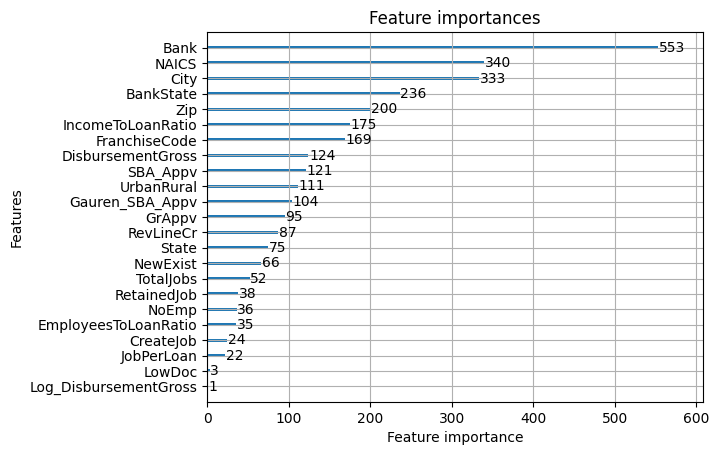

In [218]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=200)

print('Best hyperparameters:', study.best_params)
print('Best AUCPR:', study.best_value)
plt.figure(figsize=(12,6))
lgb.plot_importance(lgb_clf, max_num_features=30)
plt.title("Feature importances")
plt.show()


In [219]:
optuna.visualization.plot_optimization_history(study)

In [220]:
optuna.visualization.plot_slice(study)

In [221]:
optuna.visualization.plot_param_importances(study)

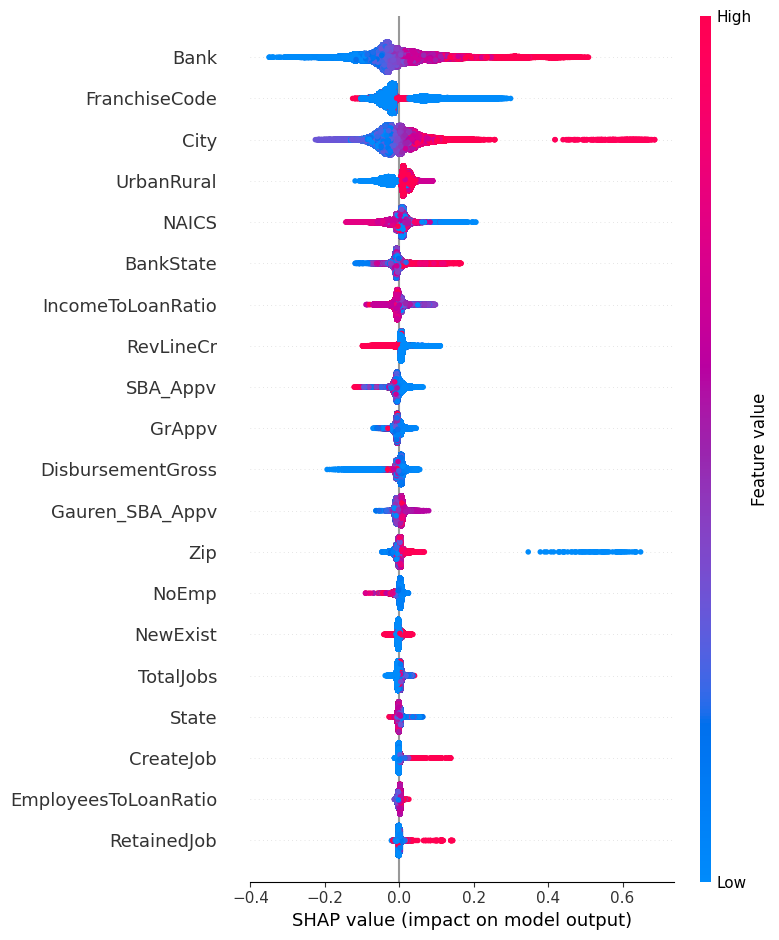

In [222]:
import shap
explainer = shap.TreeExplainer(lgb_clf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (for all features)
shap.summary_plot(shap_values, X_test) 
plt.show()

In [223]:
import shap

# Assuming you have already trained the LightGBM model and have X_test available

# Create a SHAP TreeExplainer for the trained LightGBM model
explainer = shap.TreeExplainer(lgb_clf)

# Compute SHAP values for the entire test set
shap_values = explainer.shap_values(X_test)

# Choose two records for which you want individual SHAP values (e.g., first two records)
selected_records = X_test.iloc[:2]

# Get SHAP values for the selected records
shap_values_individual = explainer.shap_values(selected_records)

# Iterate through each record and feature to display their SHAP values
for i, record in enumerate(selected_records.index):
    print(f"SHAP values for record {record}:")
    for feature, shap_val in zip(X_test.columns, shap_values_individual):
        print(f"{feature}: {shap_val[i]}")
    print()

SHAP values for record 244526:
City: -0.0029845621043343286
State: 0.049453655300920205

SHAP values for record 473020:
City: -0.0013053799770859824
State: -0.0020375273112799453



In [224]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = study.best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [225]:
best_params


{'learning_rate': 0.19347017482078024,
 'num_leaves': 650,
 'max_depth': 12,
 'min_data_in_leaf': 100,
 'lambda_l1': 0.5584872892282274,
 'lambda_l2': 3.1540434482849022,
 'bagging_fraction': 0.8,
 'bagging_freq': 5,
 'feature_fraction': 0.9,
 'is_unbalance': False}

In [226]:
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])

	Best value (AUC): 0.67142
	Best params:
		learning_rate: 0.19347017482078024
		num_leaves: 650
		max_depth: 12
		min_data_in_leaf: 100
		lambda_l1: 0.5584872892282274
		lambda_l2: 3.1540434482849022
		bagging_fraction: 0.8
		bagging_freq: 5
		feature_fraction: 0.9
		is_unbalance: False
Best model best_iteration: 5.4


In [227]:
best_params = {"verbose": -1,
                "objective":"binary",
                "metric":"auc"
            }
for key,val in study.best_params.items():
    best_params[key] = val

best_params["num_iterations"] = int(study_model_iteractions[study.best_trial.number])
print(best_params)

{'verbose': -1, 'objective': 'binary', 'metric': 'auc', 'learning_rate': 0.19347017482078024, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.5584872892282274, 'lambda_l2': 3.1540434482849022, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False, 'num_iterations': 5}


# Training the model with parameters found using Optuna

In [228]:

train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1}, categorical_feature=categorical_columns)
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1}, categorical_feature=categorical_columns)
best_lgb = lgb.train(params=best_params,
                    train_set=train_data) 

In [229]:
print("AUC score on Test dataset:", roc_auc_score(y_test, best_lgb.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, best_lgb.predict(X_train)))

AUC score on Test dataset: 0.7918785885412307
AUC score on Train dataset: 0.8032885933985646


In [230]:
from sklearn.metrics import f1_score
import numpy as np

def calculate_optimal_threshold(classifier, X, y):
    # Predict probabilities
    y_pred_proba = classifier.predict(X)
    
    # Set a range of thresholds to test
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    best_f1 = 0
    best_threshold = 0
    
    # Find the threshold that maximizes the F1 score
    for threshold in thresholds:
      y_pred = (y_pred_proba > threshold).astype(int)
      f1 = f1_score(y_test, y_pred, average='macro')
    
      if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
    return best_threshold
    
   

In [231]:
calculate_optimal_threshold(best_lgb, X_test, y_test)

0.3

In [232]:
from sklearn.metrics import f1_score

# Assuming best_lgb is the trained LightGBM model and X_test, y_test are defined

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = best_lgb.predict(X_test)

# Set a range of thresholds to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_f1 = 0
best_threshold = 0

# Find the threshold that maximizes the F1 score
for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Best F1 score:", best_f1)
print("Best threshold:", best_threshold)

Best F1 score: 0.6706352263829765
Best threshold: 0.3


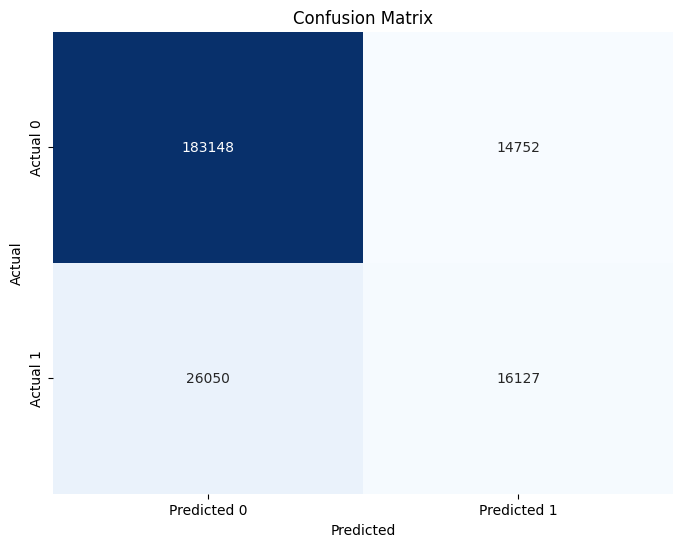

In [233]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get the predicted probabilities for the positive class (class 1) from the test set
y_pred_proba = best_lgb.predict(X_test)

# Use the threshold obtained earlier to predict binary labels
threshold = best_threshold
y_pred = (y_pred_proba > threshold).astype(int)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [234]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [235]:
from sklearn.metrics import f1_score
import numpy as np

def calculate_optimal_threshold(classifier, X, y):
    # Predict probabilities
    y_pred_proba = classifier.predict(X)
    
    # Set a range of thresholds to test
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    best_f1 = 0
    best_threshold = 0
    
    # Find the threshold that maximizes the F1 score
    for threshold in thresholds:
      y_pred = (y_pred_proba > threshold).astype(int)
      f1 = f1_score(y_test, y_pred, average='macro')
    
      if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
    return best_threshold

In [236]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from copy import deepcopy

def train_model(df):
    """
    Train sample model and save artifacts
    """
    from sklearn.linear_model import LogisticRegression
    from optuna.integration import LightGBMPruningCallback
    import tqdm as notebook_tqdm
    from sklearn.model_selection import StratifiedKFold
    import lightgbm as lgb
    from sklearn.metrics import roc_auc_score
    import optuna
    import warnings
    import pickle
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import GridSearchCV
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.metrics import average_precision_score
    import numpy as np
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    
    target_col = "MIS_Status"
    cols_to_drop = ['City', 'State', 'Zip','Bank', 'BankState', 'LowDoc','RevLineCr','MIS_Status']
    # Removing the index column
    if "index" in df.columns:
        df.drop(columns="index", inplace=True)
    y = df[target_col] if target_col in df.columns else None
    X = df.drop(columns=[target_col]) if target_col in df.columns else df.copy()


    # Relacing Missing values
    
    for i in df['RevLineCr']:
      if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
        print("RevLineCr",df['RevLineCr'].unique())

    for i in df['LowDoc']:
      if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
        print("LowDoc",df['LowDoc'].unique())

    for i in df['NewExist']:
      if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
        print("NewExist",df['NewExist'].unique())


    category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    for column in category_cols:
        df[column]=df[column].fillna(df[column].mode()[0])

    # Target encoding the categorical columns
    categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    encoder = ce.TargetEncoder(cols=categorical_columns)
    encoder.fit(df[categorical_columns], df['MIS_Status'])
    train_encoded = encoder.transform(df[categorical_columns])
    train_encoded = train_encoded.add_suffix('_trg')
    #train_encoded = pd.concat([train_encoded, data], axis=1)
    train_encoded = pd.concat([train_encoded, df], axis=1)
    for column in categorical_columns:
        train_encoded[column + "_trg"].fillna(train_encoded[column + "_trg"].mean(), inplace=True)
    
    # Renaming the columns
    #train_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in train_encoded.columns}, inplace=False)
    print(train_encoded.columns)
    


    # Adding Features
    import numpy as np
    # Apply the log transformation to the specific feature in your training data
    small_constant = 1e-10  # You can adjust this constant as needed
    # df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
    train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
    train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
    train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
    train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])
    train_encoded['TotalJobs'] = train_encoded['CreateJob'] + train_encoded['RetainedJob']
    #train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
    # Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
    train_encoded['IncomeToLoanRatio'] = train_encoded['DisbursementGross'] / train_encoded['SBA_Appv']
    # Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
    train_encoded['EmployeesToLoanRatio'] = train_encoded['NoEmp'] / train_encoded['SBA_Appv']
    # Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
    #train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
    # Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
    train_encoded['JobPerLoan'] = train_encoded['TotalJobs'] / train_encoded['SBA_Appv'] 
    # Calculate SBA's Gaurenteed Portion of Approved Loan
    train_encoded['Gauren_SBA_Appv'] = train_encoded['GrAppv'] / train_encoded['SBA_Appv']

    
    # Scaling the numerical columns
    numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross',
                        'Log_DisbursementGross', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross','TotalJobs','IncomeToLoanRatio', 
                        'EmployeesToLoanRatio', 'JobPerLoan', 'Gauren_SBA_Appv']
    
    scaler = StandardScaler()
    #fit and transform separately
    scaler.fit(train_encoded[numerical_columns])
    train_encoded[numerical_columns] = scaler.transform(train_encoded[numerical_columns])

    warnings.filterwarnings("ignore", category=UserWarning)
    study_model_iteractions = {}

    def objective(trial, X, y):
     
      param_grid = {
        # Refer to the Official guide : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
        "num_iterations": 10000,
        "num_threads": 16,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
        #"num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        #"max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        #'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        #'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0.01, 0.1, step=0.01),
        #"lambda_l2": trial.suggest_float("lambda_l2", 0.01, 0.1, step=0.01),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc",
        "num_threads": 12
       }

      cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

      cv_scores = np.empty(5)
      cv_iteractions = np.empty(5)
      for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1}, categorical_feature=categorical_columns)
        valid_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1}, categorical_feature=categorical_columns)
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_test)
        cv_scores[idx] = roc_auc_score(y_test, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
      study_model_iteractions[trial.number] = np.mean(cv_iteractions)

      return np.mean(cv_scores)

      study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
      func = lambda trial: objective(trial, X_train, y_train)
      study.optimize(func, n_trials=200)
      print('Best hyperparameters:', study.best_params)
      print('Best AUCPR:', study.best_value)

      print(f"\tBest value (AUC): {study.best_value:.5f}")
      print(f"\tBest params:")
      plt.figure(figsize=(12,6))
      lgb.plot_importance(model, max_num_features=30)
      plt.title("Feature importances")
      plt.show()

      for key, value in study.best_params.items():
        print(f"\t\t{key}: {value}")

      print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])
      best_iterations = study_model_iteractions[study.best_trial.number] 

        
    

          
   
      # End Todo
    
      # Saving the artifacts
      artifacts_dict = {
        "model": lgb_clf,
        "target_encoder": encoder,
        "te_columns": categorical_columns,
        "columns_to_train":columns_to_train,
        "numerical_columns":numerical_columns,
        "category_cols": category_cols,
        "scaler":scaler
          }

      #calculating threshold
      if y is not None:
        #optimal_threshold = calculate_optimal_threshold(clf_, train_encoded[columns_to_train], y)
        optimal_threshold = calculate_optimal_threshold(lgb_clf, train_encoded.columns, y)
        print(f"Optimal Threshold: {optimal_threshold}")
        # Saving the threshold in artifacts
        artifacts_dict["threshold"] = optimal_threshold

      artifacts_dict_file = open("./Artifacts/artifacts_dict_file.pkl", "wb")
      pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)    
       
      artifacts_dict_file.close()    
      return lgb_clf

In [237]:
from IPython.core.display import display, HTML
display(HTML("<style>.output_scroll { height:auto !important; max-height: none !important; }</style>"))
pd.set_option('display.max_rows', 5000)
from sklearn.model_selection import train_test_split
        
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2.csv")
target = "MIS_Status"
y = df[target]
x = df.drop(columns=[target])

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
df_train = X_train.copy()
df_train[target] = y_train
train_model(df_train)

RevLineCr ['N' 'Y' 'T' nan '1' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' nan '1' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '1' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '4' '.' 'C']
RevLineCr ['N' 'Y' '.' 'C']
RevLineCr ['N' 'Y' 'C']
RevLineCr ['N' 'Y']
LowDoc ['N' 'Y' 'C' nan 'A' 'S' 'R']
LowDoc ['N' 'Y' nan 'A' 'S' 'R']
LowDoc ['N' 'Y' 'A' 'S' 'R']
LowDoc ['N' 'Y' 'S' 'R']
LowDoc ['N' 'Y' 'R']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 

In [238]:
def scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    
    if "index" in data.columns:
        data.drop(columns="index", inplace=True)
    #Load Artifacts
    artifacts_dict_file = open("./Artifacts/artifacts_dict_file.pkl", "rb")
    artifacts_dict = pickle.load(file=artifacts_dict_file)
    artifacts_dict_file.close()
    

    clf = artifacts_dict["model"]
    te = artifacts_dict["target_encoder"]
    te_columns = artifacts_dict["te_columns"]
    columns_to_score = artifacts_dict["columns_to_train"]
    threshold = artifacts_dict["threshold"]
    category_cols = artifacts_dict["category_cols"]
    numerical_columns = artifacts_dict["numerical_columns"]
    scaler = artifacts_dict["scaler"]

     # Replacing the missing values
    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)

    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)

    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)

    for column in category_cols:
        data[column]=data[column].fillna(data[column].mode()[0])

    
    # 10 New Feature Extractions
    import numpy as np
    # Apply the log transformation to the specific feature in your training data
    small_constant = 1e-10  # You can adjust this constant as needed
    # df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
    data['Log_DisbursementGross'] = np.log1p(data['DisbursementGross'])
    data['Log_GrAppv'] = np.log1p(data['GrAppv'])
    data['Log_SBA_Appv'] = np.log1p(data['SBA_Appv'])
    data['Log_BalanceGross'] = np.log1p(data['BalanceGross'])
    data['TotalJobs'] = data['CreateJob'] + data['RetainedJob']
    #train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
    # Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
    data['IncomeToLoanRatio'] = data['DisbursementGross'] / data['SBA_Appv']
    # Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
    data['EmployeesToLoanRatio'] = data['NoEmp'] / data['SBA_Appv']
    # Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
    #train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
    # Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
    data['JobPerLoan'] = data['TotalJobs'] / data['SBA_Appv'] 
    # Calculate SBA's Gaurenteed Portion of Approved Loan
    data['Gauren_SBA_Appv'] = data['GrAppv'] / data['SBA_Appv']


    # Scaling the numerical columns
    data[numerical_columns] = scaler.transform(data[numerical_columns])                             
    
    # Target encoding the categorical columns
    data_encoded = te.transform(data[te_columns])
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    
    # Renaming the columns
    
    for column in te_columns:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    
    # Predicting the probabilities
    y_prob = clf.predict_proba(data_encoded[columns_to_score])
    y_pred = (y_prob[:,0] < threshold).astype(int)
    d = {
        "index": data.index,
        "label": y_pred,
        "probability_0": y_prob[:,0],
        "probability_1": y_prob[:,1],
        "threshold":threshold
    }
    #print(y_prob)
    return pd.DataFrame(d)

In [239]:
print(scoring(X_test))

         index  label  probability_0  probability_1  threshold
0            0      1       0.500004       0.499996   0.505051
1            1      0       0.639739       0.360261   0.505051
2            2      1       0.500004       0.499996   0.505051
3            3      0       0.789032       0.210968   0.505051
4            4      0       0.878069       0.121931   0.505051
...        ...    ...            ...            ...        ...
160046  160046      1       0.500004       0.499996   0.505051
160047  160047      0       0.745296       0.254704   0.505051
160048  160048      0       0.749889       0.250111   0.505051
160049  160049      1       0.500004       0.499996   0.505051
160050  160050      0       0.641459       0.358541   0.505051

[160051 rows x 5 columns]


In [240]:
print(scoring(X_train))

         index  label  probability_0  probability_1  threshold
0            0      0       0.789022       0.210978   0.505051
1            1      0       0.788778       0.211222   0.505051
2            2      0       0.914288       0.085712   0.505051
3            3      0       0.592463       0.407537   0.505051
4            4      0       0.850401       0.149599   0.505051
...        ...    ...            ...            ...        ...
640199  640199      0       0.745758       0.254242   0.505051
640200  640200      0       0.819364       0.180636   0.505051
640201  640201      0       0.748059       0.251941   0.505051
640202  640202      0       0.567862       0.432138   0.505051
640203  640203      0       0.748531       0.251469   0.505051

[640204 rows x 5 columns]


In [241]:
df2 = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2_holdout_students_valid.csv")


In [242]:
print(scoring(df2))

       index  label  probability_0  probability_1  threshold
0          0      1       0.500004       0.499996   0.505051
1          1      0       0.736423       0.263577   0.505051
2          2      1       0.500004       0.499996   0.505051
3          3      0       0.639853       0.360147   0.505051
4          4      0       0.539377       0.460623   0.505051
...      ...    ...            ...            ...        ...
98904  98904      0       0.746682       0.253318   0.505051
98905  98905      0       0.737303       0.262697   0.505051
98906  98906      1       0.500004       0.499996   0.505051
98907  98907      1       0.500004       0.499996   0.505051
98908  98908      1       0.500004       0.499996   0.505051

[98909 rows x 5 columns]


In [243]:
print(scoring(X_test))

         index  label  probability_0  probability_1  threshold
0            0      1       0.500004       0.499996   0.505051
1            1      0       0.639739       0.360261   0.505051
2            2      1       0.500004       0.499996   0.505051
3            3      0       0.789032       0.210968   0.505051
4            4      0       0.878069       0.121931   0.505051
...        ...    ...            ...            ...        ...
160046  160046      1       0.500004       0.499996   0.505051
160047  160047      0       0.745296       0.254704   0.505051
160048  160048      0       0.749889       0.250111   0.505051
160049  160049      1       0.500004       0.499996   0.505051
160050  160050      0       0.641459       0.358541   0.505051

[160051 rows x 5 columns]


In [244]:
print(scoring(df2[100:200]))

    index  label  probability_0  probability_1  threshold
0     100      0       0.852914       0.147086   0.505051
1     101      0       0.852942       0.147058   0.505051
2     102      0       0.749898       0.250102   0.505051
3     103      0       0.692439       0.307561   0.505051
4     104      0       0.819329       0.180671   0.505051
5     105      0       0.568328       0.431672   0.505051
6     106      1       0.500004       0.499996   0.505051
7     107      0       0.745293       0.254707   0.505051
8     108      0       0.852912       0.147088   0.505051
9     109      0       0.747600       0.252400   0.505051
10    110      0       0.694358       0.305642   0.505051
11    111      0       0.852914       0.147086   0.505051
12    112      0       0.746689       0.253311   0.505051
13    113      0       0.750847       0.249153   0.505051
14    114      1       0.500004       0.499996   0.505051
15    115      0       0.751205       0.248795   0.505051
16    116     